In [2]:
"""Fix columns """

'Fix columns '

In [3]:
import pandas as pd

# Number of chunks desired
num_chunks = 10

# Count total rows (excluding header)
total_rows = sum(1 for _ in open('/Users/nshaffer/Desktop/TSLA L2/XNAS-20251128-V7KRYJ435W/TSLA_2025-08-27_to_2025-11-26.csv')) - 1

# Compute chunk size for roughly equal chunks
chunk_size = total_rows // num_chunks

mbp10_headers = [
    'ts_recv', 'ts_event', 'rtype', 'publisher_id', 'instrument_id',
    'action', 'side', 'depth', 'price', 'size', 'flags', 
    'ts_in_delta', 'sequence',
    'bid_px_00', 'ask_px_00', 'bid_sz_00', 'ask_sz_00', 'bid_ct_00', 'ask_ct_00',
    'bid_px_01', 'ask_px_01', 'bid_sz_01', 'ask_sz_01', 'bid_ct_01', 'ask_ct_01',
    'bid_px_02', 'ask_px_02', 'bid_sz_02', 'ask_sz_02', 'bid_ct_02', 'ask_ct_02',
    'bid_px_03', 'ask_px_03', 'bid_sz_03', 'ask_sz_03', 'bid_ct_03', 'ask_ct_03',
    'bid_px_04', 'ask_px_04', 'bid_sz_04', 'ask_sz_04', 'bid_ct_04', 'ask_ct_04',
    'bid_px_05', 'ask_px_05', 'bid_sz_05', 'ask_sz_05', 'bid_ct_05', 'ask_ct_05',
    'bid_px_06', 'ask_px_06', 'bid_sz_06', 'ask_sz_06', 'bid_ct_06', 'ask_ct_06',
    'bid_px_07', 'ask_px_07', 'bid_sz_07', 'ask_sz_07', 'bid_ct_07', 'ask_ct_07',
    'bid_px_08', 'ask_px_08', 'bid_sz_08', 'ask_sz_08', 'bid_ct_08', 'ask_ct_08',
    'bid_px_09', 'ask_px_09', 'bid_sz_09', 'ask_sz_09', 'bid_ct_09', 'ask_ct_09'
]

chunk_index_to_load = 5  # For example, the 3rd chunk (0-based)

reader = pd.read_csv(
    '/Users/nshaffer/Desktop/TSLA L2/XNAS-20251128-V7KRYJ435W/TSLA_2025-08-27_to_2025-11-26.csv',
    header=0,
    chunksize=chunk_size
)

df = None  # Initialize variable for the chunk DataFrame

for i, chunk in enumerate(reader):
    if i == chunk_index_to_load:
        # Shift headers left by 1 (same logic as before)
        chunk.columns = mbp10_headers[:len(chunk.columns)-1] + [mbp10_headers[-1]]
        df = chunk
        break

# Now df_chunk contains the desired chunk as a DataFrame
print(f"Loaded chunk {chunk_index_to_load + 1} with shape: {df.shape}")
print(df.head())


Loaded chunk 6 with shape: (19757290, 74)
                                 ts_recv                        ts_event  \
98786450  2025-10-13T14:42:02.251702628Z  2025-10-13T14:42:02.251539532Z   
98786451  2025-10-13T14:42:02.375979059Z  2025-10-13T14:42:02.375815997Z   
98786452  2025-10-13T14:42:02.641328833Z  2025-10-13T14:42:02.641165651Z   
98786453  2025-10-13T14:42:02.703194749Z  2025-10-13T14:42:02.703030605Z   
98786454  2025-10-13T14:42:02.730789668Z  2025-10-13T14:42:02.730626651Z   

          rtype  publisher_id  instrument_id action side  depth   price  size  \
98786450     10             2          16244      A    A      0  425.87    25   
98786451     10             2          16244      C    A      1  425.91    10   
98786452     10             2          16244      C    B      6  425.65   100   
98786453     10             2          16244      T    N      0  425.86    18   
98786454     10             2          16244      C    A      0  425.87    25   

          ... 

In [4]:
import pandas as pd

# Set pandas display options to show all columns
pd.set_option('display.max_columns', None)

# Load the CSV (assuming it's already loaded as 'df' from previous cell)
# df = pd.read_csv('TSLA_2025-08-27_to_2025-11-26.csv')

# Show first 5 rows with all columns visible
df.tail(30)


,ts_recv,ts_event,rtype,publisher_id,instrument_id,action,side,depth,price,size,flags,ts_in_delta,sequence,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00,bid_ct_00,ask_ct_00,bid_px_01,ask_px_01,bid_sz_01,ask_sz_01,bid_ct_01,ask_ct_01,bid_px_02,ask_px_02,bid_sz_02,ask_sz_02,bid_ct_02,ask_ct_02,bid_px_03,ask_px_03,bid_sz_03,ask_sz_03,bid_ct_03,ask_ct_03,bid_px_04,ask_px_04,bid_sz_04,ask_sz_04,bid_ct_04,ask_ct_04,bid_px_05,ask_px_05,bid_sz_05,ask_sz_05,bid_ct_05,ask_ct_05,bid_px_06,ask_px_06,bid_sz_06,ask_sz_06,bid_ct_06,ask_ct_06,bid_px_07,ask_px_07,bid_sz_07,ask_sz_07,bid_ct_07,ask_ct_07,bid_px_08,ask_px_08,bid_sz_08,ask_sz_08,bid_ct_08,ask_ct_08,bid_px_09,ask_px_09,bid_sz_09,ask_sz_09,bid_ct_09,ask_ct_09,ask_ct_09
118543710,2025-10-23T14:10:15.320905572Z,2025-10-23T14:10:15.320743003Z,10,2,16244,C,B,0,423.81,35,128,162569,169004682,423.81,423.98,25,71,1,4,423.80,423.99,165,45,3,3,423.79,424.00,1,200,1,1,423.78,424.01,15,20,2,2,423.77,424.02,1,20,1,2,423.76,424.03,500,10,1,1,423.75,424.04,21,50,4,1,423.72,424.05,5,29,1,1,423.71,424.06,22,40,3,1,423.70,424.08,1235,10,6,1,TSLA
118543711,2025-10-23T14:10:15.320973911Z,2025-10-23T14:10:15.320811270Z,10,2,16244,A,A,0,423.98,25,128,162641,169004684,423.81,423.98,25,96,1,5,423.80,423.99,165,45,3,3,423.79,424.00,1,200,1,1,423.78,424.01,15,20,2,2,423.77,424.02,1,20,1,2,423.76,424.03,500,10,1,1,423.75,424.04,21,50,4,1,423.72,424.05,5,29,1,1,423.71,424.06,22,40,3,1,423.70,424.08,1235,10,6,1,TSLA
118543712,2025-10-23T14:10:15.326806959Z,2025-10-23T14:10:15.326644082Z,10,2,16244,A,B,4,423.77,5,128,162877,169004790,423.81,423.98,25,96,1,5,423.80,423.99,165,45,3,3,423.79,424.00,1,200,1,1,423.78,424.01,15,20,2,2,423.77,424.02,6,20,2,2,423.76,424.03,500,10,1,1,423.75,424.04,21,50,4,1,423.72,424.05,5,29,1,1,423.71,424.06,22,40,3,1,423.70,424.08,1235,10,6,1,TSLA
118543713,2025-10-23T14:10:15.334135319Z,2025-10-23T14:10:15.333972616Z,10,2,16244,C,B,0,423.81,25,128,162703,169005150,423.80,423.98,165,96,3,5,423.79,423.99,1,45,1,3,423.78,424.00,15,200,2,1,423.77,424.01,6,20,2,2,423.76,424.02,500,20,1,2,423.75,424.03,21,10,4,1,423.72,424.04,5,50,1,1,423.71,424.05,22,29,3,1,423.70,424.06,1235,40,6,1,423.69,424.08,2,10,1,1,TSLA
118543714,2025-10-23T14:10:15.363352629Z,2025-10-23T14:10:15.363189647Z,10,2,16244,A,B,0,423.80,100,128,162982,169005602,423.80,423.98,265,96,4,5,423.79,423.99,1,45,1,3,423.78,424.00,15,200,2,1,423.77,424.01,6,20,2,2,423.76,424.02,500,20,1,2,423.75,424.03,21,10,4,1,423.72,424.04,5,50,1,1,423.71,424.05,22,29,3,1,423.70,424.06,1235,40,6,1,423.69,424.08,2,10,1,1,TSLA
118543715,2025-10-23T14:10:15.409985363Z,2025-10-23T14:10:15.409822488Z,10,2,16244,C,B,0,423.80,100,128,162875,169007200,423.80,423.98,165,96,3,5,423.79,423.99,1,45,1,3,423.78,424.00,15,200,2,1,423.77,424.01,6,20,2,2,423.76,424.02,500,20,1,2,423.75,424.03,21,10,4,1,423.72,424.04,5,50,1,1,423.71,424.05,22,29,3,1,423.70,424.06,1235,40,6,1,423.69,424.08,2,10,1,1,TSLA
118543716,2025-10-23T14:10:15.427864470Z,2025-10-23T14:10:15.427699683Z,10,2,16244,T,A,0,423.80,15,0,164787,169007990,423.80,423.98,165,96,3,5,423.79,423.99,1,45,1,3,423.78,424.00,15,200,2,1,423.77,424.01,6,20,2,2,423.76,424.02,500,20,1,2,423.75,424.03,21,10,4,1,423.72,424.04,5,50,1,1,423.71,424.05,22,29,3,1,423.70,424.06,1235,40,6,1,423.69,424.08,2,10,1,1,TSLA
118543717,2025-10-23T14:10:15.427864470Z,2025-10-23T14:10:15.427699683Z,10,2,16244,T,A,0,423.80,5,0,164787,169007991,423.80,423.98,150,96,2,5,423.79,423.99,1,45,1,3,423.78,424.00,15,200,2,1,423.77,424.01,6,20,2,2,423.76,424.02,500,20,1,2,423.75,424.03,21,10,4,1,423.72,424.04,5,50,1,1,423.71,424.05,22,29,3,1,423.70,424.06,1235,40,6,1,423.69,424.08,2,10,1,1,TSLA
118543718,2025-10-23T14:10:15.427864470Z,2025-10-23T14:10:15.427699683Z,10,2,16244,C,B,0,423.80,5,128,164787,169007991,423.80,423.98,145,96,2,5,423.79,423.99,1,45,1,3,423.78,424.00,15,200,2,1,423.77,424.01,6,20,2,2,423.76,424.02,500,20,1,2,423.75,424.03,21,10,4,1,423.72,424.04,5,50,1,1,423.71,424.05,22,29,3,1,423.70,424.06,1235,40,6,1,423.69,424.08,2,10,

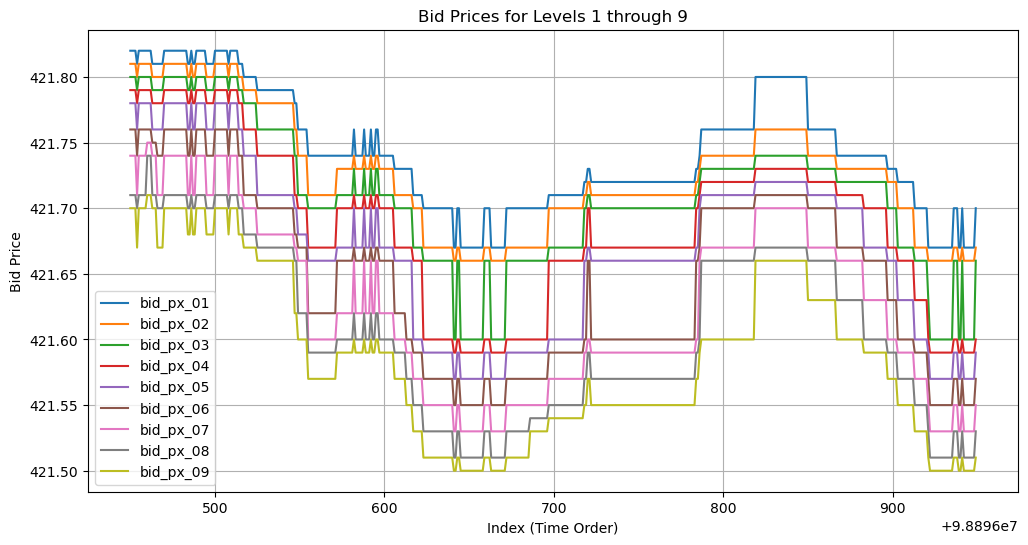

In [5]:
# Bid Prices 
import matplotlib.pyplot as plt
df_trimmed = df.iloc[110000:110500]
# Levels 1 through 9 bid price columns (excluding level 0 which is the best bid)
bid_levels = [f'bid_px_0{i}' for i in range(1, 10)]

plt.figure(figsize=(12, 6))


for level in bid_levels:
    plt.plot(df_trimmed.index, df_trimmed[level], label=level)

plt.title('Bid Prices for Levels 1 through 9')
plt.xlabel('Index (Time Order)')
plt.ylabel('Bid Price')
plt.legend()
plt.grid(True)
plt.show()


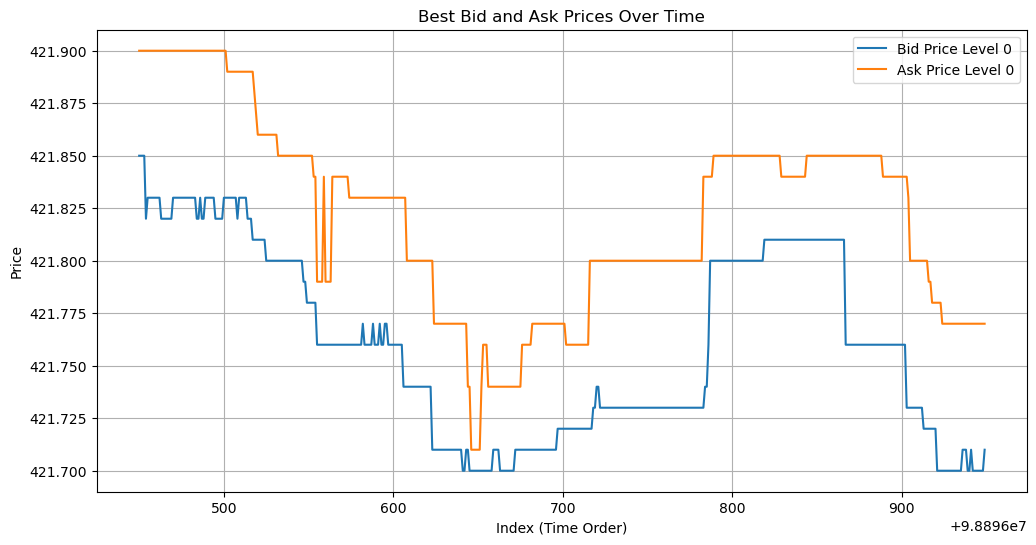

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(df_trimmed.index, df_trimmed['bid_px_00'], label='Bid Price Level 0')
plt.plot(df_trimmed.index, df_trimmed['ask_px_00'], label='Ask Price Level 0')

plt.title('Best Bid and Ask Prices Over Time')
plt.xlabel('Index (Time Order)')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# Creating Ratios 
# Calculate bid depth as sum of (bid_count * bid_price * bid_size) across all levels 0-9
bid_depth = sum(
    df[f'bid_ct_0{i}'] * df[f'bid_px_0{i}'] * df[f'bid_sz_0{i}']
    for i in range(9)
)

df['bid_depth'] = bid_depth
ask_depth = sum(
    df[f'ask_ct_0{i}'] * df[f'ask_px_0{i}'] * df[f'ask_sz_0{i}']
    for i in range(9)
)

df['ask_depth'] = ask_depth


df['depth_imbalance'] = (bid_depth - ask_depth) / (bid_depth + ask_depth)
df["100order_return"] = df['price']/df['price'].shift(100) - 1

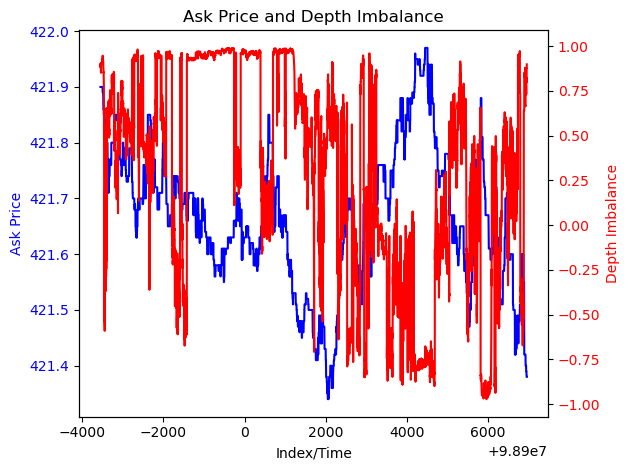

In [8]:
import matplotlib.pyplot as plt
df_trimmed = df.iloc[110000:120500]
fig, ax1 = plt.subplots()  # Create figure and primary axis

# Plot ask price on primary y-axis
ax1.plot(df_trimmed.index, df_trimmed['ask_px_00'], color='blue', label='Ask Price')
ax1.set_xlabel('Index/Time')
ax1.set_ylabel('Ask Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.plot(df_trimmed.index, df_trimmed['depth_imbalance'], color='red', label='Depth Imbalance')
ax2.set_ylabel('Depth Imbalance', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Ask Price and Depth Imbalance')
fig.tight_layout()  # Adjust layout to prevent overlap
plt.show()


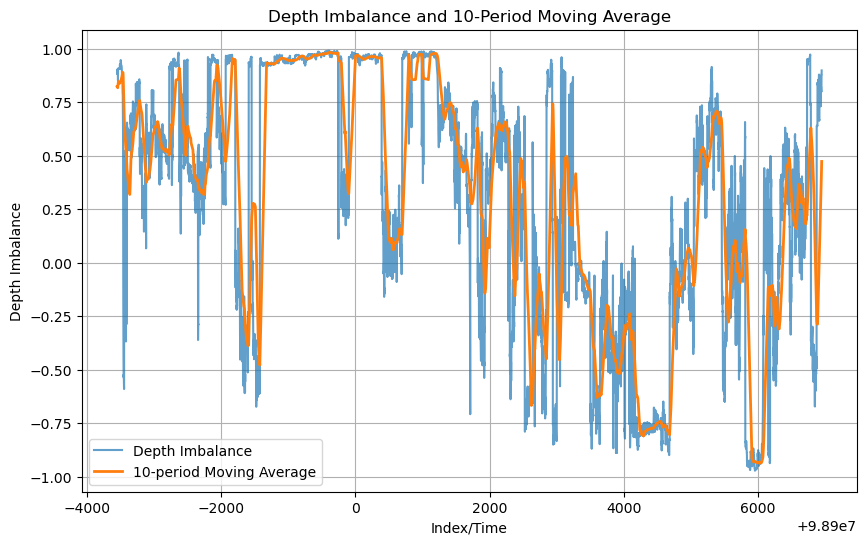

In [9]:
import matplotlib.pyplot as plt


# Calculate 10-period moving average
df['depth_imbalance_MA10'] = df['depth_imbalance'].rolling(window=100).mean()
df_trimmed = df.iloc[110000:120500]
# Plot original depth imbalance and moving average
plt.figure(figsize=(10, 6))
plt.plot(df_trimmed.index, df_trimmed['depth_imbalance'], label='Depth Imbalance', alpha=0.7)
plt.plot(df_trimmed.index, df_trimmed['depth_imbalance_MA10'], label='10-period Moving Average', linewidth=2)
plt.xlabel('Index/Time')
plt.ylabel('Depth Imbalance')
plt.title('Depth Imbalance and 10-Period Moving Average')
plt.legend()
plt.grid(True)
plt.show()



In [10]:
lag = 100
df['depth_imbalance_MA10_pct_change'] = df['depth_imbalance_MA10'].pct_change(periods=lag)

/var/folders/f_/1bh6mfq97bxdwzwnr49jf8nm0000gn/T/ipykernel_13696/1816858807.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['depth_imbalance_MA10_pct_change'] = df['depth_imbalance_MA10'].pct_change(periods=lag)


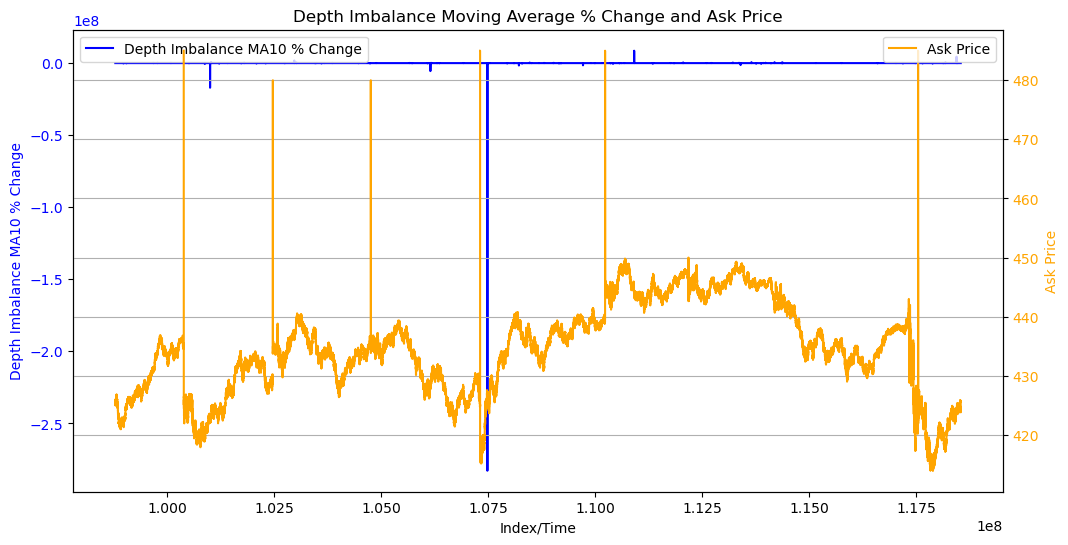

In [11]:
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots(figsize=(12, 6))


# Plot depth imbalance moving average percent change on primary y-axis
ax1.plot(df.index, df['depth_imbalance_MA10_pct_change'], label='Depth Imbalance MA10 % Change', color='blue')
ax1.set_xlabel('Index/Time')
ax1.set_ylabel('Depth Imbalance MA10 % Change', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')


# Create secondary y-axis
ax2 = ax1.twinx()
ax2.plot(df.index, df['ask_px_00'], label='Ask Price', color='orange')
ax2.set_ylabel('Ask Price', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')


# Title and legends
plt.title('Depth Imbalance Moving Average % Change and Ask Price')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


plt.grid(True)
plt.show()

In [12]:
# Walk Ratio
df['ask_product_sum'] = (
    df['ask_px_00'] * df['ask_sz_00'] * df['ask_ct_00'] +
    df['ask_px_01'] * df['ask_sz_01'] * df['ask_ct_01'] +
    df['ask_px_02'] * df['ask_sz_02'] * df['ask_ct_02']
)

df['bid_product_sum'] = (
    df['bid_px_00'] * df['bid_sz_00'] * df['bid_ct_00'] +
    df['bid_px_01'] * df['bid_sz_01'] * df['bid_ct_01'] +
    df['bid_px_02'] * df['bid_sz_02'] * df['bid_ct_02']
)

df['ask_bid_ratio'] = df['ask_product_sum'] / df['bid_product_sum']


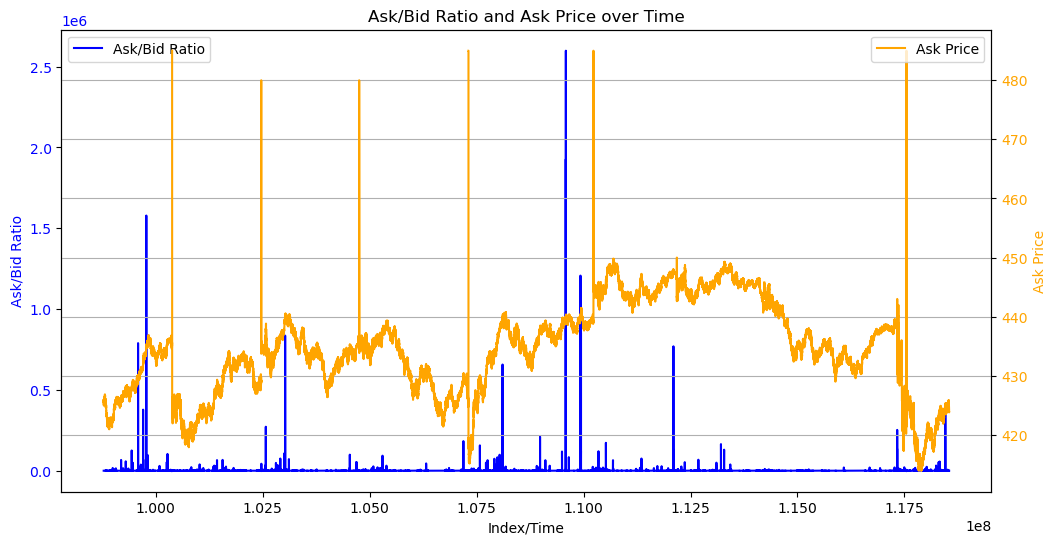

In [13]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the ask_bid_ratio on the primary y-axis
ax1.plot(df.index, df['ask_bid_ratio'], label='Ask/Bid Ratio', color='blue')
ax1.set_xlabel('Index/Time')
ax1.set_ylabel('Ask/Bid Ratio', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create secondary y-axis for price
ax2 = ax1.twinx()
ax2.plot(df.index, df['ask_px_00'], label='Ask Price', color='orange')
ax2.set_ylabel('Ask Price', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title and legends
plt.title('Ask/Bid Ratio and Ask Price over Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid(True)
plt.show()


In [14]:
import numpy as np

levels = [f"{i:02d}" for i in range(9)]

# Calculate product sums for bids and asks across all rows
bid_product = sum(df[f'bid_px_{lvl}'] * df[f'bid_sz_{lvl}'] * df[f'bid_ct_{lvl}'] for lvl in levels)
ask_product = sum(df[f'ask_px_{lvl}'] * df[f'ask_sz_{lvl}'] * df[f'ask_ct_{lvl}'] for lvl in levels)

# Create masks for bid and ask sides
mask_bid = df['side'] == 'B'
mask_ask = df['side'] == 'A'

# Initialize new columns with NaN
df['Order flow Bid'] = np.nan
df['Order flow Ask'] = np.nan

# Compute rolling sums for bids and assign to filtered rows
df.loc[mask_bid, 'Order flow Bid'] = bid_product[mask_bid].rolling(window=100, min_periods=1).sum()

# Compute rolling sums for asks and assign to filtered rows
df.loc[mask_ask, 'Order flow Ask'] = ask_product[mask_ask].rolling(window=100, min_periods=1).sum()

# Assuming bid_product_sum and ask_product_sum columns exist for normalization
df['Fbid'] = df['Order flow Bid'] / df['bid_product_sum']
df['Fask'] = df['Order flow Ask'] / df['ask_product_sum']


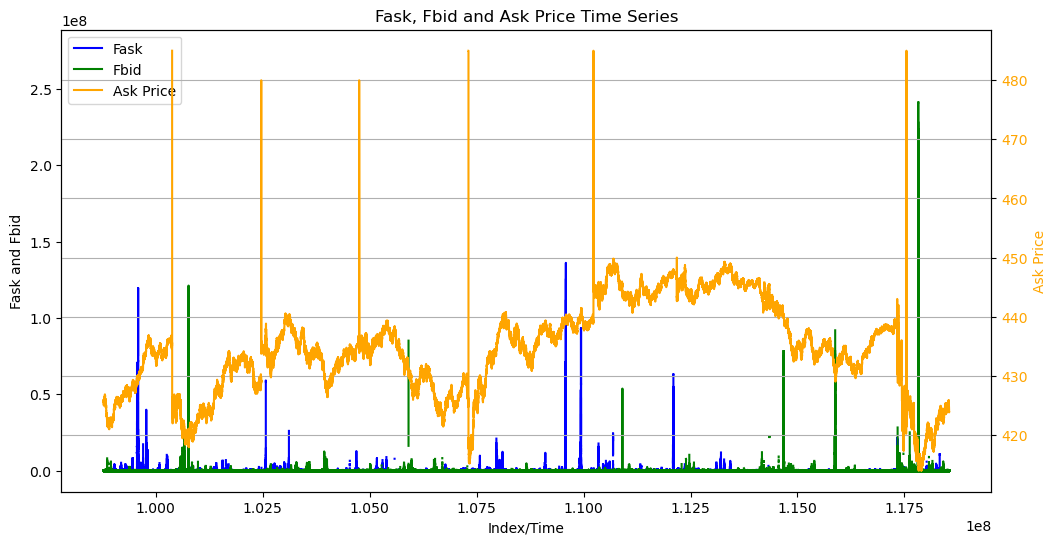

In [15]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Fask and Fbid on primary y-axis
ax1.plot(df.index, df['Fask'], label='Fask', color='blue')
ax1.plot(df.index, df['Fbid'], label='Fbid', color='green')
ax1.set_xlabel('Index/Time')
ax1.set_ylabel('Fask and Fbid', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create the secondary y-axis for price
ax2 = ax1.twinx()
ax2.plot(df.index, df['ask_px_00'], label='Ask Price', color='orange')
ax2.set_ylabel('Ask Price', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('Fask, Fbid and Ask Price Time Series')
plt.grid(True)
plt.show()


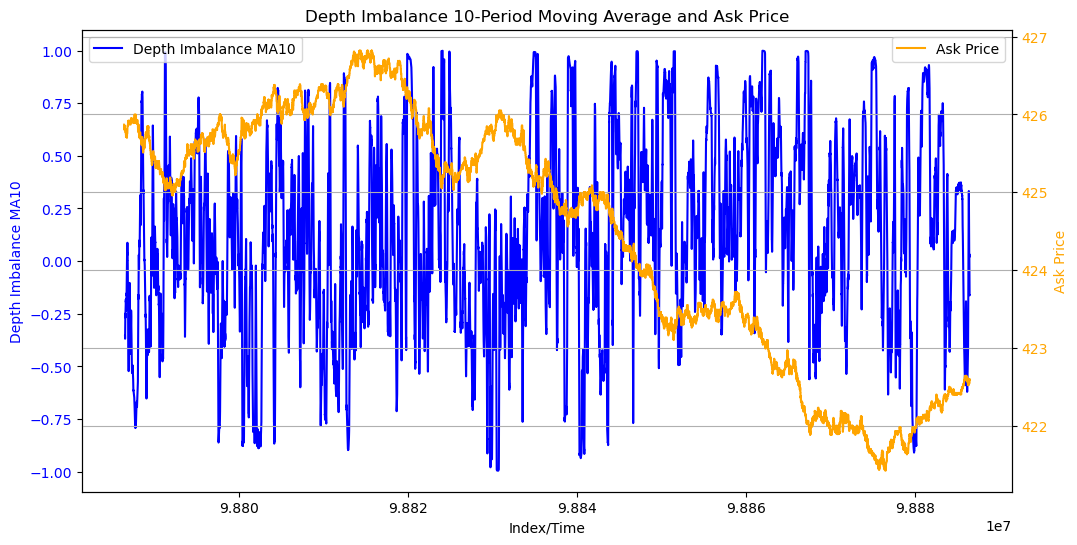

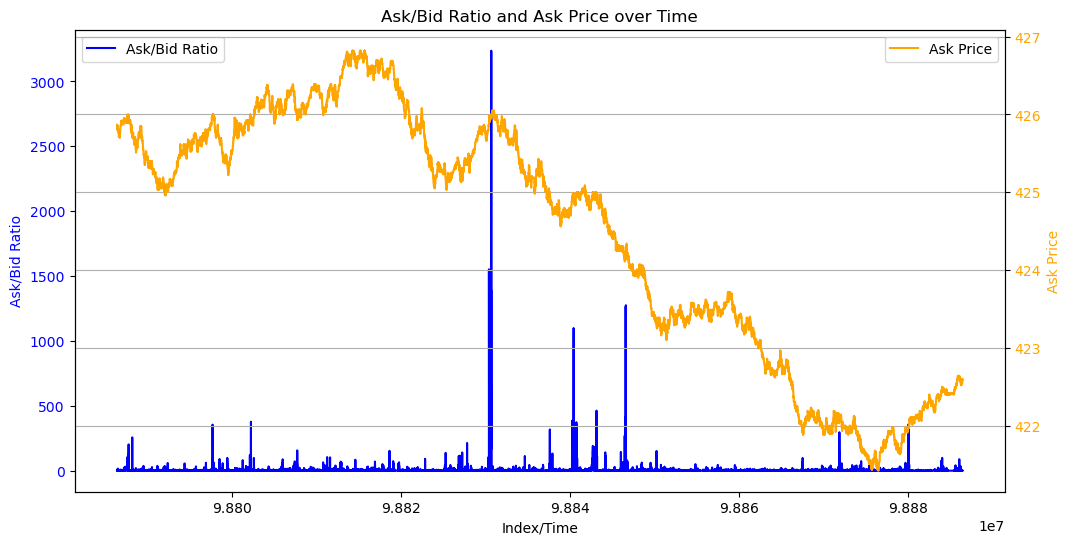

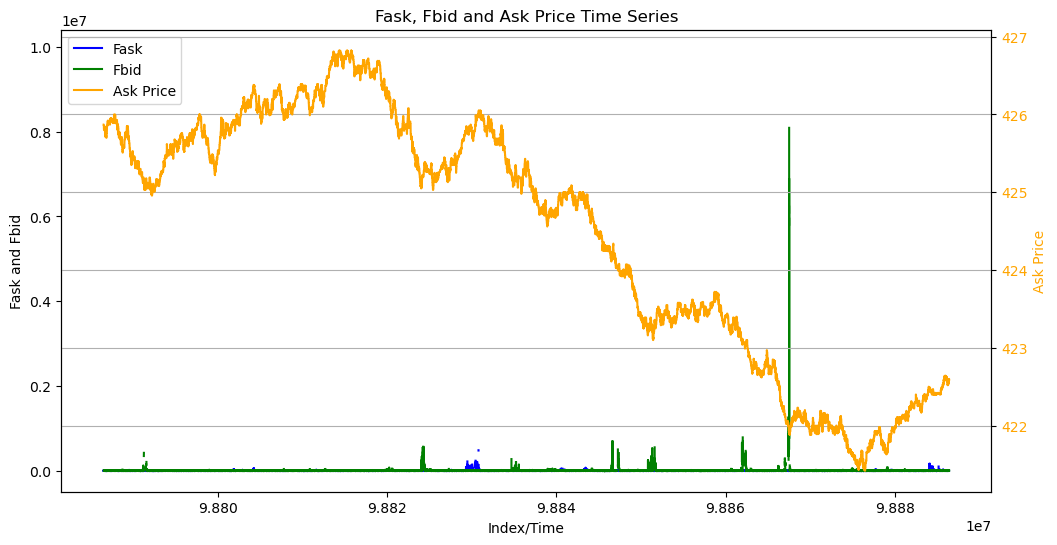

Start date: 2025-10-13 14:42:02.251539532+00:00
End date: 2025-10-13 14:53:47.783035337+00:00
Elapsed time in trimmed range: 0 days 00:11:45.531495805


In [27]:
import matplotlib.pyplot as plt
# Filter out rows where the relevant column (e.g., 'ask_px_00') exceed 20,000
filtered_df = df[df['ask_px_00'] <= 20000].copy()

# Set your trimmed dataframe to filtered_df
chart_df = filtered_df.iloc[0:100000]
# Set your trimmed dataframe


fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot depth imbalance moving average on primary y-axis
ax1.plot(chart_df.index, chart_df['depth_imbalance_MA10'], label='Depth Imbalance MA10', color='blue')
ax1.set_xlabel('Index/Time')
ax1.set_ylabel('Depth Imbalance MA10', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create secondary y-axis for ask price
ax2 = ax1.twinx()
ax2.plot(chart_df.index, chart_df['ask_px_00'], label='Ask Price', color='orange')
ax2.set_ylabel('Ask Price', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Depth Imbalance 10-Period Moving Average and Ask Price')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(True)
plt.show()

# 2. Ask/Bid Ratio and Ask Price over Time
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(chart_df.index, chart_df['ask_bid_ratio'], label='Ask/Bid Ratio', color='blue')
ax1.set_xlabel('Index/Time')
ax1.set_ylabel('Ask/Bid Ratio', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(chart_df.index, chart_df['ask_px_00'], label='Ask Price', color='orange')
ax2.set_ylabel('Ask Price', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Ask/Bid Ratio and Ask Price over Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(True)
plt.show()

# 3. Fask, Fbid and Ask Price Time Series
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(chart_df.index, chart_df['Fask'], label='Fask', color='blue')
ax1.plot(chart_df.index, chart_df['Fbid'], label='Fbid', color='green')
ax1.set_xlabel('Index/Time')
ax1.set_ylabel('Fask and Fbid', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(chart_df.index, chart_df['ask_px_00'], label='Ask Price', color='orange')
ax2.set_ylabel('Ask Price', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('Fask, Fbid and Ask Price Time Series')
plt.grid(True)
plt.show()
# Assume ts_event is datetime type, if not convert it
df['ts_event'] = pd.to_datetime(df['ts_event'])

# Set trimmed dataframe

start_date = chart_df['ts_event'].iloc[0]
end_date = chart_df['ts_event'].iloc[-1]

elapsed_time = end_date - start_date

print(f"Start date: {start_date}")
print(f"End date: {end_date}")
print(f"Elapsed time in trimmed range: {elapsed_time}")




In [28]:
"""import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assume chart_df is your trimmed dataframe and contains 'depth_imbalance_MA10' and 'ask_px_00'

# Calculate future 100-point returns for ask price
# For each index i, calculate return from ask_px_00[i] to ask_px_00[i+100]
chart_df['future_100_return'] = (chart_df['ask_px_00'].shift(-6000) - chart_df['ask_px_00']) / chart_df['ask_px_00']

# Drop rows with NaN values in future_100_return (last 100 rows will have NaN)
regression_df = chart_df.dropna(subset=['future_100_return'])

# Get X and Y variables for regression
X = regression_df['depth_imbalance_MA10'].values
Y = regression_df['future_100_return'].values

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(X, Y)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

# Plot data points and regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, intercept + slope * X, color='red', label=f'Fit line: y={slope:.4f}x + {intercept:.4f}')
plt.xlabel('Depth Imbalance MA10')
plt.ylabel('Future 100-Point Ask Price Returns')
plt.title('Linear Regression: Depth Imbalance vs. Future 100-Point Returns')
plt.legend()
plt.grid(True)
plt.show()"""


'import pandas as pd\nimport matplotlib.pyplot as plt\nfrom scipy.stats import linregress\n\n# Assume chart_df is your trimmed dataframe and contains \'depth_imbalance_MA10\' and \'ask_px_00\'\n\n# Calculate future 100-point returns for ask price\n# For each index i, calculate return from ask_px_00[i] to ask_px_00[i+100]\nchart_df[\'future_100_return\'] = (chart_df[\'ask_px_00\'].shift(-6000) - chart_df[\'ask_px_00\']) / chart_df[\'ask_px_00\']\n\n# Drop rows with NaN values in future_100_return (last 100 rows will have NaN)\nregression_df = chart_df.dropna(subset=[\'future_100_return\'])\n\n# Get X and Y variables for regression\nX = regression_df[\'depth_imbalance_MA10\'].values\nY = regression_df[\'future_100_return\'].values\n\n# Perform linear regression\nslope, intercept, r_value, p_value, std_err = linregress(X, Y)\n\nprint(f"Slope: {slope}")\nprint(f"Intercept: {intercept}")\nprint(f"R-squared: {r_value**2}")\nprint(f"P-value: {p_value}")\n\n# Plot data points and regression li

In [31]:
# Number of points to look ahead
n = 100000

# Conditions at each point except the last n points (to avoid out-of-bounds)
condition = (df['depth_imbalance_MA10'][:-n] > 0.00) & (df['ask_bid_ratio'][:-n] < .30) & (df['Fbid'][:-n]>0)

# Prices n points in future
future_prices = df['ask_px_00'][n:].reset_index(drop=True)

# Corresponding current ask prices (aligned with future prices)
current_ask_prices = df['ask_px_00'][:-n].reset_index(drop=True)

# Boolean Series: future price > current ask price where condition holds
comparison = (future_prices > current_ask_prices) & condition.reset_index(drop=True)

# Calculate percentage
percentage_gt_ask_future = comparison.sum() / condition.sum() * 100 if condition.sum() > 0 else 0

print(f"Percentage of prices greater than ask price after {n} points in the future: {percentage_gt_ask_future:.2f}%")


Percentage of prices greater than ask price after 100000 points in the future: 53.82%


In [30]:
"""# Threshold maximization
import numpy as np

n = 6000

# Define threshold ranges for grid search
imbalance_thresholds = np.linspace(0, 1, 21)  # 0 to 1 by 0.05
ask_bid_ratio_thresholds = np.linspace(0, 2, 21)  # 0 to 2 by 0.1
Fbid_thresholds = np.linspace(0, 1, 21)  # 0 to 1 by 0.05

# Slice the arrays to align current and future prices
depth_imbalance = df['depth_imbalance_MA10'][:-n].values
ask_bid_ratio = df['ask_bid_ratio'][:-n].values
Fbid = df['Fbid'][:-n].values
future_prices = df['ask_px_00'][n:].values
current_ask_prices = df['ask_px_00'][:-n].values

best_percentage = 0
best_params = (None, None, None)

for imbalance_thresh in imbalance_thresholds:
    cond_imbalance = depth_imbalance > imbalance_thresh
    for ratio_thresh in ask_bid_ratio_thresholds:
        cond_ask_bid = ask_bid_ratio < ratio_thresh  # or > depending on your hypothesis
        for fbid_thresh in Fbid_thresholds:
            cond_fbid = Fbid > fbid_thresh
            condition = cond_imbalance & cond_ask_bid & cond_fbid
            total = condition.sum()
            if total == 0:
                continue
            comparison = (future_prices > current_ask_prices) & condition
            percentage = comparison.sum() / total * 100
            if percentage > best_percentage:
                best_percentage = percentage
                best_params = (imbalance_thresh, ratio_thresh, fbid_thresh)

print(f"Max percentage: {best_percentage:.2f}%")
print(f"At depth_imbalance_MA10 > {best_params[0]}, ask_bid_ratio < {best_params[1]}, Fbid > {best_params[2]}")"""


'# Threshold maximization\nimport numpy as np\n\nn = 6000\n\n# Define threshold ranges for grid search\nimbalance_thresholds = np.linspace(0, 1, 21)  # 0 to 1 by 0.05\nask_bid_ratio_thresholds = np.linspace(0, 2, 21)  # 0 to 2 by 0.1\nFbid_thresholds = np.linspace(0, 1, 21)  # 0 to 1 by 0.05\n\n# Slice the arrays to align current and future prices\ndepth_imbalance = df[\'depth_imbalance_MA10\'][:-n].values\nask_bid_ratio = df[\'ask_bid_ratio\'][:-n].values\nFbid = df[\'Fbid\'][:-n].values\nfuture_prices = df[\'ask_px_00\'][n:].values\ncurrent_ask_prices = df[\'ask_px_00\'][:-n].values\n\nbest_percentage = 0\nbest_params = (None, None, None)\n\nfor imbalance_thresh in imbalance_thresholds:\n    cond_imbalance = depth_imbalance > imbalance_thresh\n    for ratio_thresh in ask_bid_ratio_thresholds:\n        cond_ask_bid = ask_bid_ratio < ratio_thresh  # or > depending on your hypothesis\n        for fbid_thresh in Fbid_thresholds:\n            cond_fbid = Fbid > fbid_thresh\n            co